In [7]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from datetime import datetime
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)

# my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve

## Comparing different all weather portfolios

In [8]:
dictionary = {'x1 leverage' : ['VTI', 'VGLT', 'VGIT', 'IAU', 'PDBC'],
              'x2 leverage' : ['SSO', 'UBT', 'UST', 'DIG', 'UGL'],
              'x3 leverage' : ['UPRO', 'TMF', 'TYD']}

dictionary_util =  {'Utilities instead commodities' : ['VTI', 'VGLT', 'VGIT', 'VPU', 'IAU'], 
                    'Utilities instead commodities x3 leverage' : ['UPRO', 'TMF', 'TYD', 'UTSL'],
                    'Utilities instead commodities x2 leverage' : ['SSO', 'UBT', 'UST', 'UPW', 'UGL']}

dictionary_TRP = {'True risk parity' : ['VGLT', 'VTI', 'VGIT', 'VPU', 'IAU'],
                  'True risk parity x3 leverage' : ['TMF', 'UPRO', 'TYD', 'UTSL','UGL' ]}

In [13]:
estimator = 'satchell'
window = 30
dict_df = {}
for name in dictionary:
    list_securities = dictionary[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.

    if estimator == 'stdv':
        unique_name = 'stdv'
        for i in list_securities:
            unique_name += '_' + i
            
        df_strd_dev = ve.dataframe_strd_dev(data, 30)
        df_strd_dev = ve.index_df(df_strd_dev, data)
        #data_perc = hep.perc_df(data)
        #inv_volat_data = hep.df_inverse_volatility(data_perc, window)
        #df_weighted = hep.df_wheighted(inv_volat_data)
        
    if estimator == 'parkinson':
        unique_name = 'parkinson'
        for i in list_securities:
            unique_name += '_' + i
    
        data_h_l = ve.create_dataframe_high_low(list_securities)   
        data_h_l = data_h_l[-1834:]
        df_volat = ve.compute_park_volatility(data_h_l, list_securities, window)
        data.dropna(inplace = True)
        data = data[-1834:]
        df_volat = ve.index_df(df_volat, data, window)
        df_weighted = hep.df_wheighted(df_volat)
    
    if estimator == 'satchell':
        unique_name = 'satchell'
        for i in list_securities:
            unique_name += '_' + i
            
        data_ohlc = ve.create_dataframe_ohlc(list_securities)
        data_ohlc = data_ohlc[-1834:]
        df_satchell_volat = ve.compute_satchell_volatility(data_ohlc, list_securities, window)
        data.dropna(inplace = True)
        data = data[-1834:]
        df_satchell_volat = ve.index_df(df_satchell_volat, data, window)
        df_weighted = hep.df_wheighted(df_satchell_volat)
        display(df_weighted)
        
    data_r = data.div(data.shift(1))-1
    data_earnings = hep.df_earnings(df_weighted, data_r)
    data_earnings.dropna(inplace = True)
    
    data_earnings = data_earnings[-1834:] 
    dict_df[name] = data_earnings
#data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
#
#data_perc = hep.perc_df(data)
#inv_volat_data = hep.df_inverse_volatility(data_perc, window)
#data_wheighted = hep.df_wheighted(inv_volat_data)
#data_earnings = hep.df_earnings(data_wheighted, data_perc)
##data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
#data_earnings.dropna(inplace = True)
#data_earnings = data_earnings[-1834:] #1834 len of the no leverage portfolio
##data_earn_eq_weight.dropna(inplace = True)
##display(data_earn_eq_weight)
#dict_df[name] = data_earnings

['VTI', 'VGLT', 'VGIT', 'IAU', 'PDBC']


,VTI,VGLT,VGIT,IAU,PDBC
2014-12-29,0.298192,0.204869,0.086635,0.262425,0.147879
2014-12-30,0.298746,0.207480,0.086840,0.259517,0.147417
2014-12-31,0.300936,0.211217,0.087241,0.252800,0.147806
2015-01-02,0.301419,0.214880,0.082846,0.252934,0.147922
2015-01-05,0.303035,0.222223,0.089546,0.251101,0.134096
...,...,...,...,...,...
2022-02-18,0.226112,0.162697,0.047340,0.195376,0.368475
2022-02-22,0.223782,0.164707,0.047821,0.196500,0.367190
2022-02-23,0.219235,0.165511,0.048276,0.197693,0.369285
2022-02-24,0.217204,0.166776,0.048974,0.196633,0.370413


['SSO', 'UBT', 'UST', 'DIG', 'UGL']


,SSO,UBT,UST,DIG,UGL
2014-12-29,0.214077,0.177456,0.065556,0.361836,0.181076
2014-12-30,0.214725,0.178475,0.065986,0.361269,0.179544
2014-12-31,0.215496,0.181016,0.066856,0.362413,0.174220
2015-01-02,0.215635,0.181617,0.066964,0.360815,0.174969
2015-01-05,0.213094,0.183365,0.069134,0.362664,0.171744
...,...,...,...,...,...
2022-02-18,0.213414,0.164322,0.058571,0.381351,0.182342
2022-02-22,0.210503,0.166710,0.058865,0.381460,0.182462
2022-02-23,0.208292,0.169345,0.059261,0.377550,0.185553
2022-02-24,0.207804,0.169612,0.058464,0.377285,0.186835


['UPRO', 'TMF', 'TYD']


,UPRO,TMF,TYD
2014-12-29,0.464236,0.351272,0.184492
2014-12-30,0.463454,0.353448,0.183098
2014-12-31,0.461676,0.358449,0.179876
2015-01-02,0.461373,0.359241,0.179386
2015-01-05,0.457242,0.364789,0.177970
...,...,...,...
2022-02-18,0.473429,0.392074,0.134497
2022-02-22,0.467958,0.396373,0.135669
2022-02-23,0.461486,0.401655,0.136860
2022-02-24,0.458673,0.404601,0.136726


In [14]:
dict_df

{'x1 leverage':                  VTI      VGLT      VGIT       IAU      PDBC       Tot
 2014-12-30 -0.001472  0.000752  0.000135  0.003170  0.000000  0.002585
 2014-12-31 -0.002979  0.000517  0.000163 -0.003487 -0.001372 -0.007159
 2015-01-02 -0.000228  0.001713  0.000231  0.001327 -0.001248  0.001796
 2015-01-05 -0.005207  0.003373  0.000139  0.003930 -0.001648  0.000588
 2015-01-06 -0.002912  0.003515  0.000296  0.002441 -0.001577  0.001764
 ...              ...       ...       ...       ...       ...       ...
 2022-02-18 -0.001810  0.001588  0.000059 -0.000216  0.001414  0.001034
 2022-02-22 -0.002571  0.000373  0.000000  0.000490  0.004911  0.003205
 2022-02-23 -0.004034 -0.002207 -0.000164  0.000875  0.003482 -0.002048
 2022-02-24  0.003806  0.000221  0.000099 -0.001246  0.002537  0.005418
 2022-02-25  0.004909  0.000020 -0.000016 -0.000616 -0.006492 -0.002194
 
 [1803 rows x 6 columns],
 'x2 leverage':                  SSO       UBT       UST       DIG       UGL       Tot
 2014-

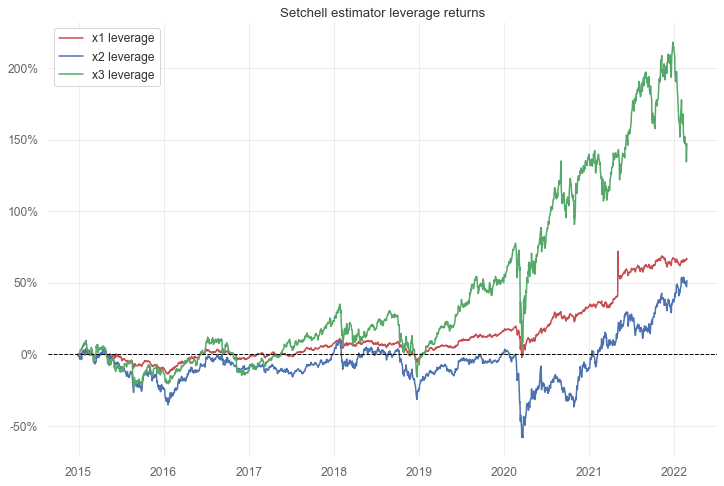

In [15]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis

#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Setchell estimator leverage returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_df['x1 leverage']['Tot']), lw=1.5, label='x1 leverage', color='r', alpha=1)
ax.plot(compsum(dict_df['x2 leverage']['Tot']), lw=1.5, label='x2 leverage', color='b', alpha=1)
ax.plot(compsum(dict_df['x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()

plt.savefig('../img/all_weather_satchell_compare_leverage')

In [10]:
window = 30
dict_util_df = {}
for name in dictionary_util:
    list_securities = dictionary_util[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
    
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    data_wheighted = hep.df_wheighted(inv_volat_data)
    data_earnings = hep.df_earnings(data_wheighted, data_perc)
    #data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
    data_earnings.dropna(inplace = True)
    data_earnings = data_earnings[-1834:] #1834 len of the no leverage portfolio

    #data_earn_eq_weight.dropna(inplace = True)
    #display(data_earn_eq_weight)
    dict_util_df[name] = data_earnings

['VTI', 'VGLT', 'VGIT', 'VPU', 'IAU']
['UPRO', 'TMF', 'TYD', 'UTSL']
['SSO', 'UBT', 'UST', 'UPW', 'UGL']


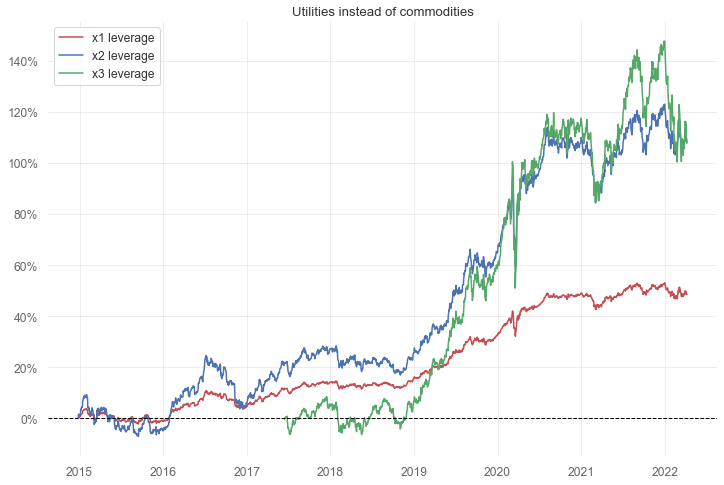

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Utilities instead of commodities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_util_df['Utilities instead commodities']['Tot']), lw=1.5, label='x1 leverage', color='r', alpha=1)
ax.plot(compsum(dict_util_df['Utilities instead commodities x2 leverage']['Tot']), lw=1.5, label='x2 leverage', color='b', alpha=1)
ax.plot(compsum(dict_util_df['Utilities instead commodities x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
plt.savefig('../img/all_weather_utilities_no_commodities_compare_leverage')

In [36]:
window = 30
dict_TRP_df = {}
for name in dictionary_TRP:
    list_securities = dictionary_TRP[name]
    print(list_securities)
    data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.
    
    data_perc = hep.perc_df(data)
    inv_volat_data = hep.df_inverse_volatility(data_perc, window)
    data_wheighted = hep.df_wheighted(inv_volat_data)
    data_earnings = hep.df_earnings(data_wheighted, data_perc)
    #data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
    data_earnings.dropna(inplace = True)
    #data_earn_eq_weight.dropna(inplace = True)
    #display(data_earn_eq_weight)
    dict_TRP_df[name] = data_earnings

['VGLT', 'VTI', 'VGIT', 'VPU', 'IAU']
['TMF', 'UPRO', 'TYD', 'UTSL', 'UGL']


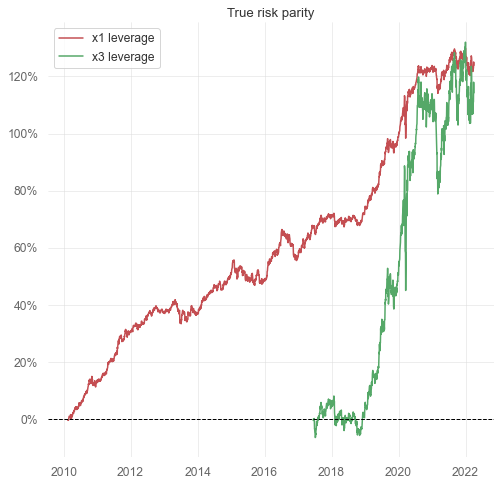

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('True risk parity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(compsum(dict_TRP_df['True risk parity']['Tot']), lw=1.5, label='x1 leverage', color='r', alpha=1)
ax.plot(compsum(dict_TRP_df['True risk parity x3 leverage']['Tot']), lw=1.5, label='x3 leverage', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
plt.savefig('../img/all_weather_true_risk_parity_compare_leverage')